# K-means Clustering
**K-means** is a centroid-based clustering technique that partitions the dataset into $k$ distinct clusters, where each data point belongs to the cluster with the nearest center. It is one of the simplest and most efficient methods for clustering. K-means has been successfully employed in numerous applications across diverse areas such as customer segmentation, image compression, document clustering, and anomaly detection.

## Centroid-Based Clustering
Each cluster is represented by a central vector, called the cluster center or centroid, which is not necessarily the member of the dataset. The cluster centroid is typically formed as the mean of the points that belong to that cluster.

Formally, given $n$ data points: ${x_1, x_2, ..., x_n}$, where each data point is a $m$-dimensional real vector, $x_i \in \mathbb{R}^m$, and an integer $k$, where $k < n$, the goal is to find a set of $k$ points, $C = {c_1, c_2, ..., c_k}$, in $\mathbb{R}^m$ to minimize the objective function:

$$\sum_{i=1}^{k} \sum_{x \in C_i} \left\| x - c_i \right\|^2$$

where $C_i$ is the $i$-th cluster in $C$. The objective function is also called the **distortion** of the clustering or the **inertia** of the cluster set or the **within-cluster sum-of-squares (WCSS).** WCSS quantifies the compactness (or cohesiveness) of the clusters. The smaller WCSS we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

Finding the centroids and cluster assignments that minimize the WCSS is an NP-Hard problem (even when there are only two clusters), but efficient heuristic algorithms such as k-means can converge quickly to a local minimum of the WCSS.

## K-Means Algorithm
1. Randomly select $k$ points as the initial centroids.
2. Assignmnet step: assign each data point to the cluster with the nearest centroid.

$$C_i^{(t)} = \{x \in X: \left\| x - c_i^{(t)} \right\|^2 \leq \left\| x - c_j^{(t)} \right\|^2 \forall j, 1 \leq j \leq k\}$$

where $C_i^{(t)}$ is the set of points that belong to cluster $i$ at iteration $t$ and $c_i^{(t)}$ is the centroid of cluster $i$ at iteration $t$.

3. Update step: calculate the new centroids of each cluster.

$$c_i^{(t+1)} = \frac{1}{|C_i^{(t)}|} \sum_{x \in C_i^{(t)}} x$$

4. Repeat steps 2 and 3 until the centroids do not change.

The K-Means algorithm is guaranteed to converge to solution; however, it might be a local minimum. Due to the sensitivity of the algorithm to the initial choice of centroids, it is common to run it multiple times with different initializations. The time complexity of the algorithm is $O(knmt)$, where $k$ is the number of clusters, $n$ is the number of data points, $m$ is the number of dimensions, and $t$ is the number of iterations.

## K-Means Clustering

In this section, we implement K-Means clustering as a custom estimator in `Scikit-Learn`. This involves extending the `BaseEstimator` class and implementing essential methods for unsupervised learning. The primary method, `fit()`, will execute the K-Means algorithm and store important outcomes such as cluster centers and assignments. Additionally, we may include a `predict()` method for assigning new data points to the formed clusters.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs, make_moons

In [2]:
class KMeans(BaseEstimator):
    def __init__(self, n_clusters, max_iter=100, random_seed=None, verbose=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter 
        self.random_state = np.random.RandomState(random_seed)
        self.verbose = verbose
        
    def fit(self, X):
        # Randomly select the initial centroids from the given points (with no replacement)
        idx = self.random_state.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx]
        if self.verbose: print('Centroids:', self.centroids)
            
        # Allocate a distances matrix between the data points and the centroids
        distances = np.zeros((len(X), self.n_clusters))
        prev_labels = None
            
        # Run the algorithm until convergence or max_iter has been reached
        for iteration in range(self.max_iter):        
            if self.verbose: print('\nIteration', iteration)
                            
            # Compute the distances to the cluster centroids
            for i in range(self.n_clusters):
                distances[:, i] = np.sum((X - self.centroids[i])**2, axis=1)
                
            # Assign each data point to the cluster with the nearest centroids
            self.labels = np.argmin(distances, axis=1) 
            if self.verbose: print('Labels:', self.labels)
            
            # Check if there was no change in the cluster assignments
            if np.all(self.labels == prev_labels):
                break
            prev_labels = self.labels
                
            # Recompute the centroids
            for i in range(self.n_clusters):
                self.centroids[i] = np.mean(X[self.labels == i], axis=0)
                
                # Handle empty clusters
                if np.isnan(self.centroids[i]).any():
                    self.centroids[i] = X[self.random_state.choice(len(X))]      
                                
            if self.verbose: print('Centroids:', self.centroids)

In [20]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
def plot_data_with_color(X, y):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='tab10', edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
def plot_clusters(X, labels, centroids):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='x', color='k', s=100, legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [4]:
X, y = make_blobs(n_samples=100, centers=5, random_state=10)
X = StandardScaler().fit_transform(X)

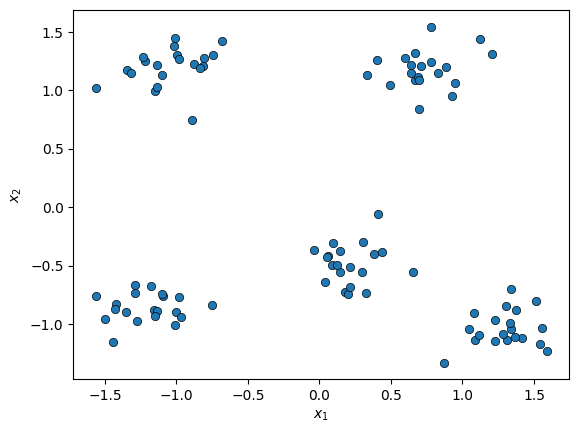

In [5]:
plot_data(X)

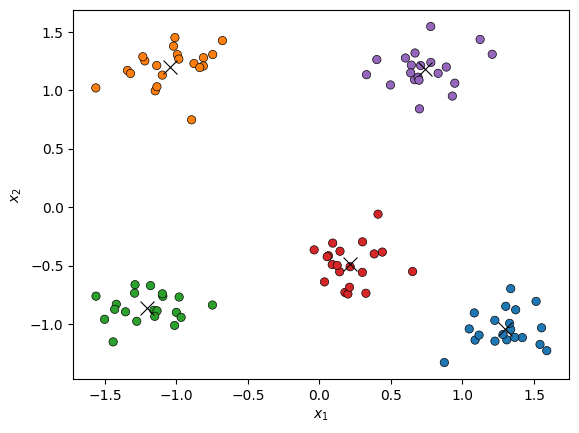

In [6]:
kmeans = KMeans(n_clusters=5, random_seed=1)  
kmeans.fit(X)

plot_clusters(X, kmeans.labels, kmeans.centroids)

The five clusters were correctly identified in this case. However, running the algorithm with a different random seed may lead to bad clustering. For example, running the algorithm with a random seed of 0 yields the following clustering:

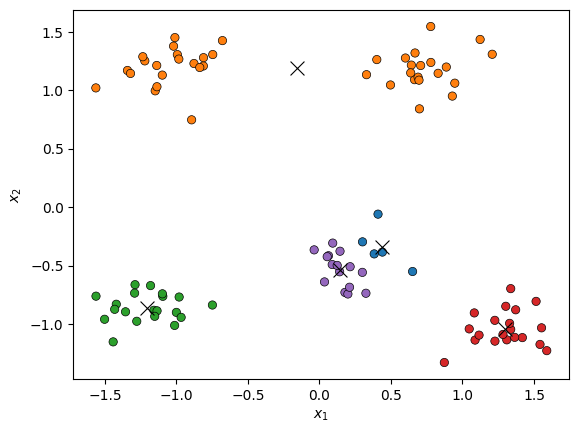

In [7]:
kmeans = KMeans(n_clusters=5, random_seed=0)  
kmeans.fit(X)

plot_clusters(X, kmeans.labels, kmeans.centroids)

In general, k-means is highly sensitive to the initial placement of the centroids. Therefore, choosing an appropriate initialization method for the algorithm is crucial for obtaining a good clustering.

## Initialization Methods
- **Forgy**: Randomly choose $k$ data points as the initial centroids.
- **Random Partition**: Randomly assign each data point to a cluster and calculate the initial centroids as the mean of the data points in each cluster.

Both methods are sensitive to outliers. A better initialization method is **K-Means++**.

### K-Means++
1. Randomly choose the first centroid from the data points.
2. For each data point, calculate the distance $D(x)$ between the point and the nearest centroid that has already been chosen.
3. Randomly choose the next centroid from the data points such that the probability of choosing a point $x$ is proportional to $D(x)^2$.
4. Repeat steps 2 and 3 until $k$ centroids have been chosen.
5. Proceed with the standard K-Means algorithm.

<hr>

## K-Means in Scikit-Learn
The class `KMeans` in the module `sklearn.cluster` provides an implementation of the k-means algorithm. 

- `n_clusters:` The number of clusters to create (defaults to 8).
- `init:` The method for initialization. Can be chosen from the following options: `k-means++` (the default), `random`, an array with the initial centroids, or a custom function that returns the initial centroids.
- `n_init:` The number of times the algorithm is run with different centroid seeds (defaults to 10). The final clustering is the best output from all the runs (the one with the lowest inertia). In version 1.4 of Scikit-Learn, the default value of `n_init` will change to `auto`, which means that the number of runs depends on the value of init: 10 if using `init='random'` and 1 if using `init='k-means++'.`
- `max_iter:` Maximum number of iterations (defaults to 300).
- `tol:` The algorithm stops when the Frobenius norm of the difference between the cluster centroids of two consecutive iterations is less than the tolerance (defaults to $10^{-4}$).
- `algorithm:` The k-means algorithm to use. The options are `lloyd` (the default) or `elkan.

In [9]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, n_init='auto', random_state=0)

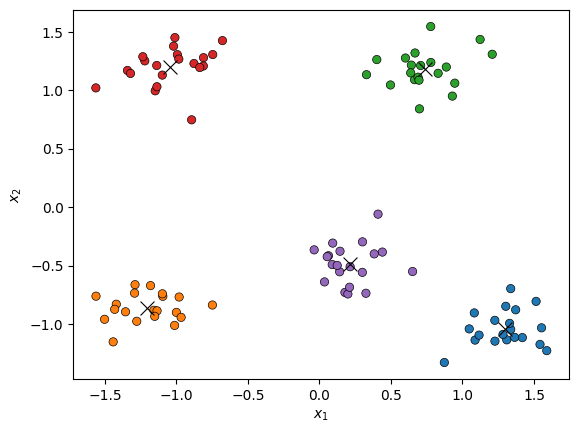

In [12]:
plot_clusters(X, kmeans.labels_, kmeans.cluster_centers_)

In [13]:
print(kmeans.inertia_)

6.154048637438846


We can also display the **Voronoi diagram** induced by this clustering. A Voronoi diagram is a partition of the plane into regions based on distance to a specific set of points (called sites). For each site, there is a corresponding region (called Voronoi cell) that consists of all the points in the plane that are closer to that site than to any other. Voronoi diagrams have numerous applications in fields such as computer graphics and computational geometry.

In [14]:
def plot_voronoi_diagram(clusterer, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), colors='k')
    
    plt.scatter(X[:, 0], X[:, 1], color='k', s=20)
    centroids = clusterer.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

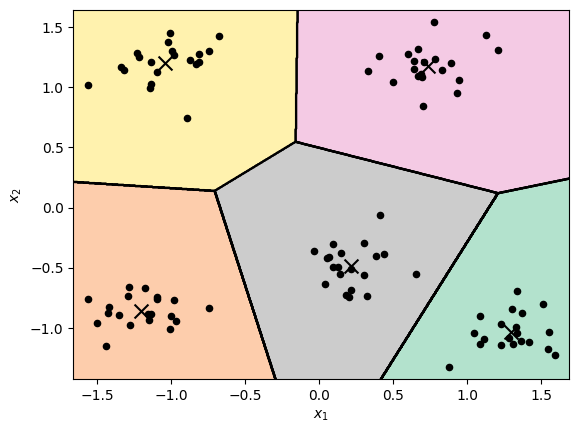

In [15]:
plot_voronoi_diagram(kmeans, X)

## Choosing the Number of Clusters
The number of clusters $k$ is a hyperparameter of the algorithm. There is no easy way to choose the best $k$; however, there are some methods that can help.

### Elbow Method
The elbow method is a heuristic method that plots the distortion for different values of $k$ and chooses the value of $k$ at the "elbow" of the plot.

### Silhouette Score
The silhouette score is a metric that measures how similar a data point is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the data point is well matched to its own cluster and poorly matched to neighboring clusters. If most data points have a high silhouette score, then the clustering configuration is appropriate. If many data points have a low or negative silhouette score, then the clustering configuration may have too many or too few clusters.

Text(0, 0.5, 'Inertia')

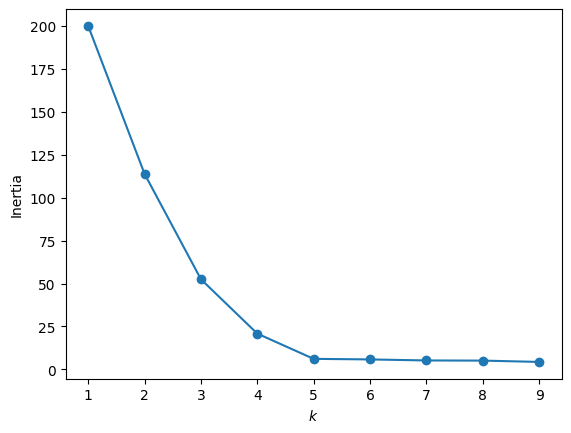

In [18]:
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(np.arange(1, 10), inertias, 'o-')
plt.xlabel('$k$')
plt.ylabel('Inertia')

In this case, it is clear that the elbow is located at $k = 5$, which indicates that $k = 5$ is indeed a good choice for this dataset.

## Limitations of K-Means
- The algorithm is sensitive to outliers.
- The algorithm is sensitive to the initial choice of centroids.
- The algorithm is not suitable for clusters with non-convex shapes.
- The algorithm is not suitable when the clusters have different sizes and densities.

### 1. Unevenly sized clusters

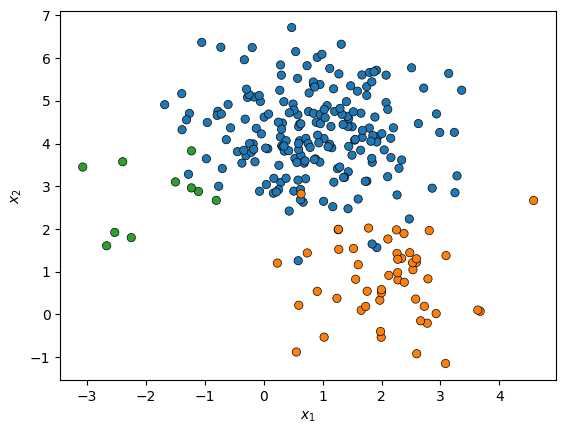

In [23]:
X, y = make_blobs(n_samples=1000, random_state=0)
X_reduced = np.vstack((X[y == 0][:200], X[y == 1][:50], X[y == 2][:10])) 
y_reduced = [0] * 200 + [1] * 50 + [2] * 10
plot_data_with_color(X_reduced, y_reduced)

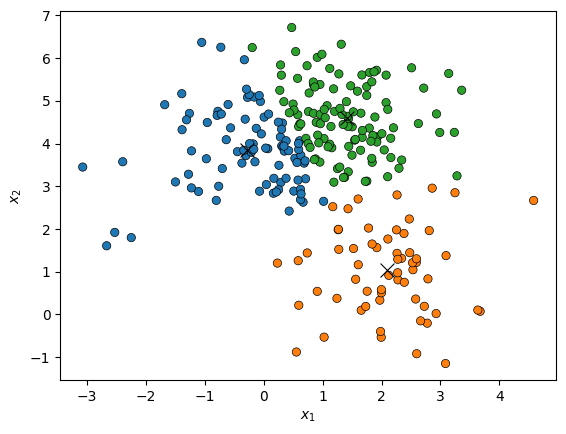

In [24]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans.fit(X_reduced)
plot_clusters(X_reduced, kmeans.labels_, kmeans.cluster_centers_)

### 2. Clusters with unequal variance

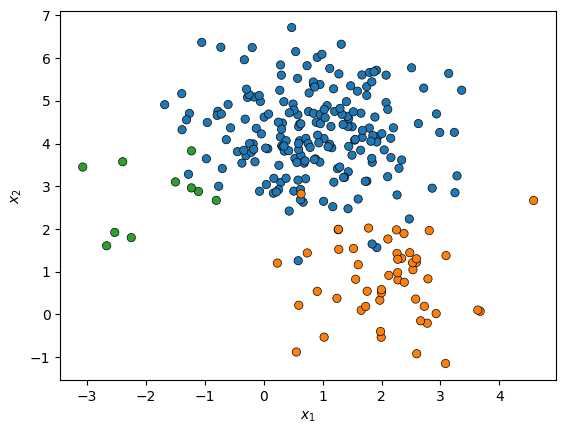

In [25]:
X_varied, y_varied = make_blobs(n_samples=500, cluster_std=[1, 2.5, 0.5], random_state=20)
plot_data_with_color(X_reduced, y_reduced)

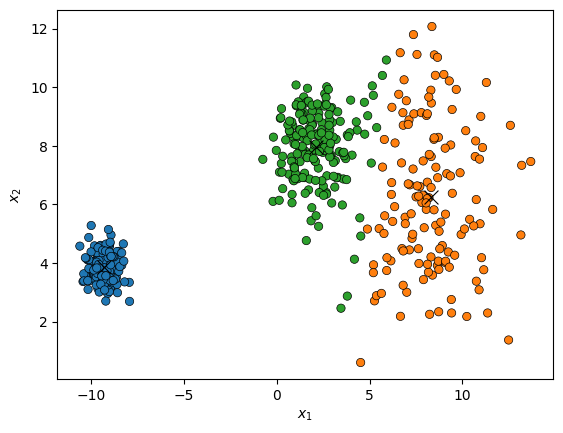

In [26]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans.fit(X_varied)
plot_clusters(X_varied, kmeans.labels_, kmeans.cluster_centers_)

### 3. Clusters with non-globular shapes

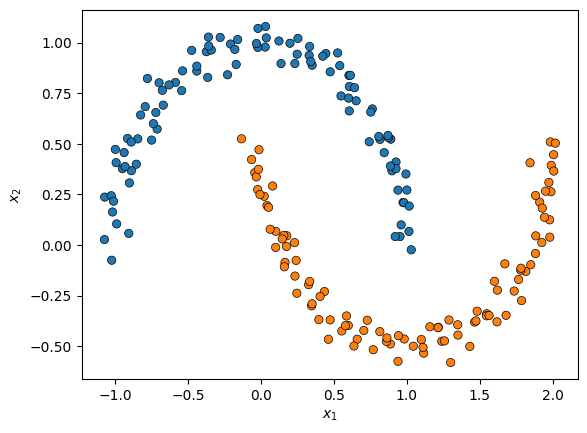

In [28]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=0)
plot_data_with_color(X_moons, y_moons)

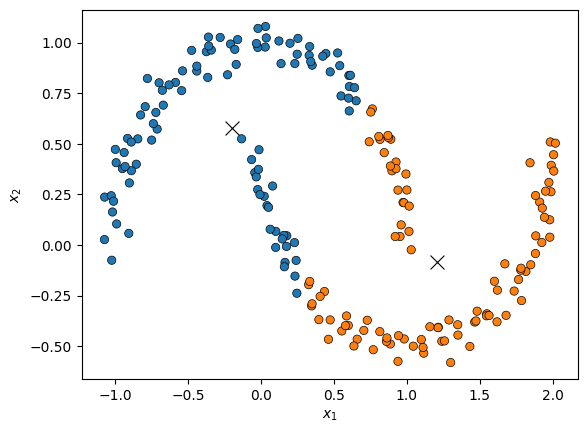

In [29]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)
kmeans.fit(X_moons)
plot_clusters(X_moons, kmeans.labels_, kmeans.cluster_centers_)

## Summary
Let’s summarize the pros and cons of k-means as compared to other clustering algorithms.

**Pros:**
- Easy to understand and implement.
- Computationally efficient.
- Can handle large datasets.
- Guaranteed to converge, although it might end up in a local optimum.
- Variants of k-means such as k-medians and k-medoids can handle different types of data.

**Cons:**
- The number of clusters $k$ needs to be specified in advance. There are methods to determine an optimal $k$, but they can be time-consuming and may not always provide a clear answer.
- Finds only a local optimum solution, which can be arbitrarily bad with respect to the objective function compared to the optimal clustering.
- Sensitive to outliers as they can influence the location of the centroids significantly.
- Does not work well with clusters of different sizes and densities, or clusters with non-spherical shapes.
- The worst-case running time of the algorithm is super-polynomial in the input size. However, in practice, the algorithm converges after a relatively small number of iterations for the majority of the datasets.
- Cannot be used with non-numerical data. Modifications such as k-medoids are required for categorical data.
- Uses the Euclidean distance metric, which might not be always the most suitable metric for all datasets.
- Does not work well with high-dimensional data due to the curse of dimensionality. Running a dimensionality reduction algorithm like PCA prior to k-means can alleviate this problem and speed up computations.